#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 19
**CH19A Food and health**

using the food-health dataset

version 0.9.0 2025-08-14

In [1]:
import os
import sys
import warnings

import pandas as pd
import numpy as np
import pyfixest as pf
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/food-health/clean/"
data_out = dirname + "da_case_studies/ch19-food-health"
output = dirname + "da_case_studies/ch19-food-health/output/"

func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [ ]:
# Import the prewritten helper functions
import da_helper_functions as da

# Set custom color scheme for plots
sns.set_theme(rc=da.da_theme, palette=da.color)

___

In [4]:
# !!! make sure you have run ch19-food-health.ipynb before
data = pd.read_csv(data_in + "food-health.csv")

In [5]:
data

,seqn,food_code,days,grams,vitaminc,alcohol,caffeine,cholesterol,year,gramsm,...,bp_diastolic,total_cholesterol,hdl,weight,height,ldl,bmi,normal_weight,blood_pressure,heart_risk
0,51624.0,13110100.0,1.0,268.25,1.6,0.0,0.0,118.0,2009.0,142.817400,...,88.0,50.0,135.0,87.4,164.7,85.0,32.219903,0,202.0,287.0
1,51628.0,92410310.0,1.0,491.20,0.0,0.0,39.0,0.0,2009.0,500.116060,...,70.0,45.0,202.0,116.8,166.0,157.0,42.386413,0,224.0,381.0
2,51629.0,53106050.0,2.0,122.86,0.0,0.0,3.5,46.5,2009.0,118.094826,...,50.0,45.0,160.0,97.6,173.0,115.0,32.610512,0,152.0,267.0
3,51630.0,63101000.0,1.0,223.00,10.3,0.0,0.0,0.0,2009.0,156.844160,...,82.0,45.0,259.0,86.7,168.4,214.0,30.572779,0,200.0,414.0
4,51633.0,51300150.0,1.0,32.25,0.0,0.0,0.0,0.0,2009.0,67.798810,...,62.0,75.0,182.0,79.1,174.3,107.0,26.036446,0,204.0,311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16479,83721.0,93401020.0,1.0,150.00,0.0,15.5,0.0,0.0,2013.0,248.777020,...,70.0,55.0,138.0,79.5,176.2,83.0,25.606801,0,178.0,261.0
16480,83723.0,58100125.0,1.0,278.00,3.6,0.0,0.0,33.0,2013.0,257.290000,...,NaN,49.0,186.0,99.5,173.5,137.0,33.054008,0,NaN,NaN
16481,83724.0,24201120.0,1.0,51.00,0.0,0.0,0.0,39.0,2013.0,97.344420,...,70.0,51.0,157.0,77.1,176.0,106.0,24.890238,1,234.0,340.0
16482,83727.0,54403020.0,1.0,88.00,0.0,0.0,0.0,0.0,2013.0,40.483818,...,68.0,55.0,190.0,71.8,171.3,135.0,24.468634,1,178.0,313.0


In [6]:
workfile = data.query("age>=30&age<60")

In [7]:
# new variables: 
  ## Fruit and vegetables per day (grams)
  ## Blood pressure (systolic+diastolic)

In [8]:
workfile = workfile.rename(columns={"veggies_n_fruits_gr":"fv","blood_pressure":"bp"})

In [9]:
workfile["fv"].describe()

count    7930.000000
mean      261.058836
std       285.358857
min         0.000000
25%        52.081874
50%       186.840000
75%       378.932500
max      5047.000000
Name: fv, dtype: float64

In [10]:
workfile["bp"].describe()

count    7360.000000
mean      193.708288
std        23.736936
min       129.000000
25%       178.000000
50%       192.000000
75%       208.000000
max       300.000000
Name: bp, dtype: float64

In [11]:
workfile = (
    workfile.loc[workfile["fv"] < 3200].dropna(subset=["bp"]).reset_index(drop=True)
)

In [12]:
# Days per week exercising
workfile["exerc"] = None
workfile.loc[workfile["paq655"] <= 7, "exerc"] = workfile["paq655"]
workfile.loc[workfile["paq650"] == 2, "exerc"] = 0
workfile["exerc"] = pd.to_numeric(workfile["exerc"])

In [13]:
# Potato chips per day, grams
workfile = workfile.rename(columns={"gr_potato_chips": "pchips"})

In [14]:
workfile = workfile.rename(columns={"gr_potato_chips": "pchips"})

### Descriptive table

In [15]:
(
    workfile[["bp", "fv"]]
    .describe()
    .rename(
        columns={
            "bp": "Blood pressure (systolic+diastolic)",
            "fv": "Fruit and vegetables per day (grams)",
        }
    )
    .T.rename(
        columns={
            "50%": "Median",
            "mean": "Mean",
            "count": "Observations",
            "max": "Maximum",
            "min": "Minimum",
            "std": "Std.Dev.",
        }
    )
    .round()
    .astype(int)
    .filter(["Mean", "Median", "Std.Dev.", "Minimum", "Maximum", "Observations"])
)

,Mean,Median,Std.Dev.,Minimum,Maximum,Observations
Blood pressure (systolic+diastolic),194,192,24,129,300,7358
Fruit and vegetables per day (grams),260,188,274,0,2740,7358


### SCATTERPLOT AND REGRESSION LINE 

In [16]:
# Blood pressure vs amount of fruit and vegetables
reg = pf.feols("bp ~ fv", data=workfile)
reg.summary()

###

Estimation:  OLS
Dep. var.: bp, Fixed effects: 0
Inference:  iid
Observations:  7358

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |    2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|--------:|--------:|
| Intercept     |    194.742 |        0.381 |   510.939 |      0.000 | 193.995 | 195.489 |
| fv            |     -0.004 |        0.001 |    -3.934 |      0.000 |  -0.006 |  -0.002 |
---
RMSE: 23.713 R2: 0.002 


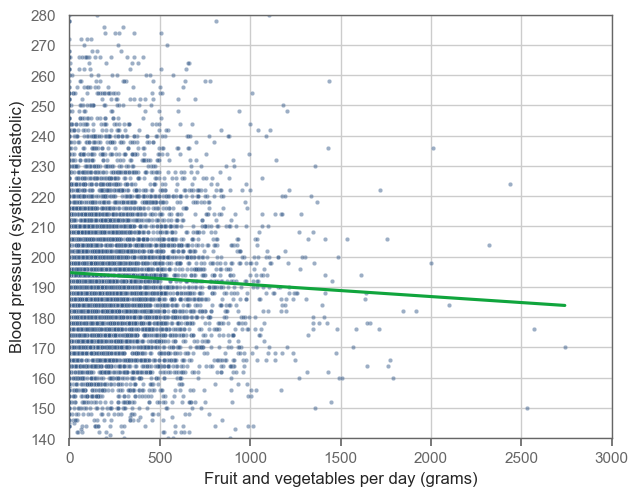

In [ ]:
# scatterplot and regression line
sns.scatterplot(data=workfile, x="fv", y="bp", s=10, alpha=0.5)
sns.regplot(
    data=workfile,
    x="fv",
    y="bp",
    scatter=False,
    line_kws={"color": da.color[1]},
    ci=None,
)
plt.xlabel("Fruit and vegetables per day (grams)")
plt.ylabel("Blood pressure (systolic+diastolic)")
plt.xlim(0, 3000)
plt.ylim(140, 280)
plt.xticks(da.seq(0, 3000, 500))
plt.yticks(da.seq(140, 280, 10))
plt.show()

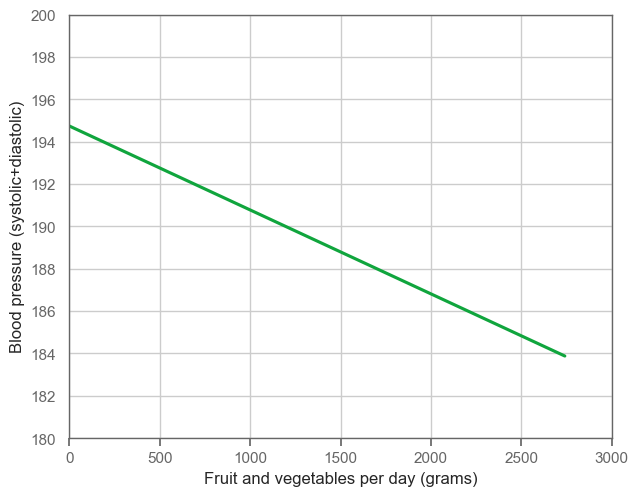

In [ ]:
# regression line only
sns.regplot(
    data=workfile,
    x="fv",
    y="bp",
    scatter=False,
    line_kws={"color": da.color[1]},
    ci=None,
)
plt.xlabel("Fruit and vegetables per day (grams)")
plt.ylabel("Blood pressure (systolic+diastolic)")
plt.xlim(0, 3000)
plt.ylim(180, 200)
plt.xticks(da.seq(0, 3000, 500))
plt.yticks(da.seq(180, 200, 2))
plt.show()

#### Log household income per capita vs fruit and vegetables per day,grams

In [19]:
# gen Log household income per capita
workfile["lninc"] = np.log(workfile["hh_income_percap"])

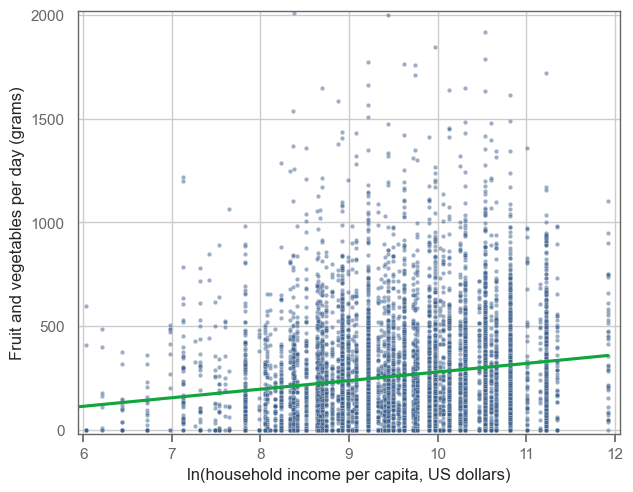

In [ ]:
# gen Log household income per capita
fig, ax = plt.subplots()
sns.scatterplot(data=workfile, x="lninc", y="fv", s=10, alpha=0.5)
sns.regplot(
    data=workfile,
    x="lninc",
    y="fv",
    scatter=False,
    line_kws={"color": da.color[1]},
    ci=None,
)
plt.xlabel("ln(household income per capita, US dollars)")
plt.ylabel("Fruit and vegetables per day (grams)")
plt.xlim(6, 12)
plt.ylim(0, 2000)
plt.yticks(da.seq(0, 2000, 500))
da.add_margin(ax, x=0.01, y=0.01)
plt.show()

In [21]:
# Amount of fruit and vegetables per day, g (fv) vs Days per week vigorous recreational activities (exerc)
workfile.groupby("exerc").agg(tab_exerc=("year", "count"))

,tab_exerc
exerc,
0.0,5665
1.0,248
2.0,354
3.0,474
4.0,258
5.0,213
6.0,77
7.0,68


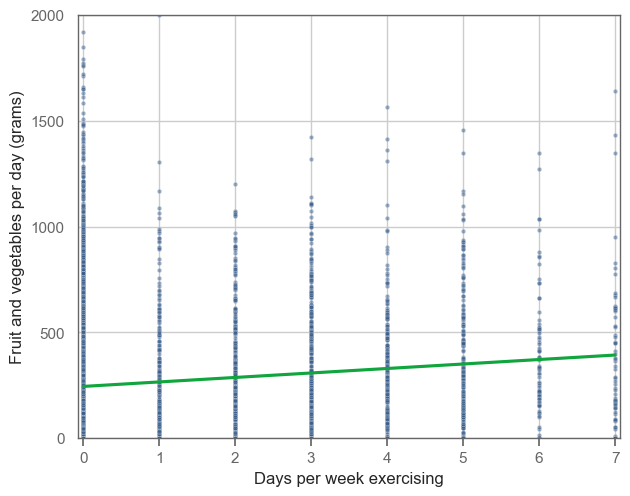

In [ ]:
# potato chips (potato_chips) and amount of fruit and vegetables per day (fv)
fig, ax = plt.subplots()
sns.scatterplot(
    data=workfile.dropna(subset=["exerc"]), x="exerc", y="fv", s=10, alpha=0.5
)
sns.regplot(
    data=workfile,
    x="exerc",
    y="fv",
    scatter=False,
    line_kws={"color": da.color[1]},
    ci=None,
)
plt.xlabel("Days per week exercising")
plt.ylabel("Fruit and vegetables per day (grams)")
plt.xlim(0, 7)
plt.ylim(0, 2000)
plt.yticks(da.seq(0, 2000, 500))
da.add_margin(ax, x=0.01, y=0)
plt.show()

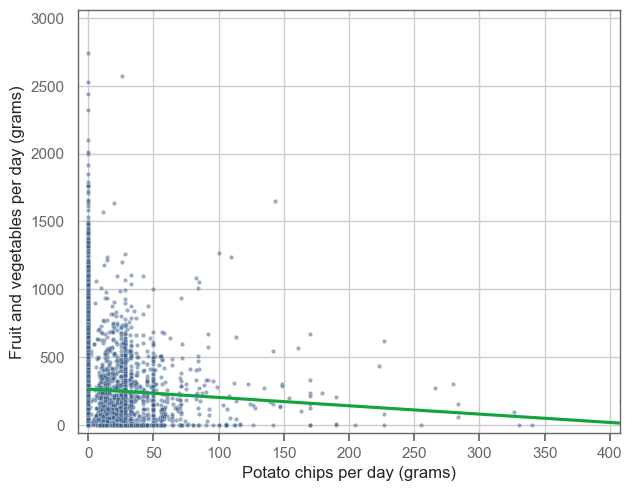

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=workfile, x="pchips", y="fv", s=10, alpha=0.5)
sns.regplot(
    data=workfile,
    x="pchips",
    y="fv",
    scatter=False,
    line_kws={"color": da.color[1]},
    ci=None,
)
plt.xlabel("Potato chips per day (grams)")
plt.ylabel("Fruit and vegetables per day (grams)")
plt.xlim(0, 400)
plt.xticks(da.seq(0, 400, 50))
plt.ylim(0, 3000)
plt.yticks(da.seq(0, 3000, 500))
da.add_margin(ax, x=0.02, y=0.02)
plt.show()

In [24]:
reg1 = pf.feols("bp ~ fv", data=workfile, vcov="HC1")
reg2 = pf.feols("fv ~ lninc", data=workfile, vcov="HC1")
reg3 = pf.feols("fv ~ exerc", data=workfile, vcov="HC1")
reg4 = pf.feols("fv ~ pchips", data=workfile, vcov="HC1")

In [25]:
pf.etable([reg1, reg2, reg3, reg4])

GT(_tbl_data=  level_0        level_1                        0                          1  \
0    coef             fv   -0.004*** <br> (0.001)                              
1    coef          lninc                              41.359*** <br> (3.285)   
2    coef          exerc                                                       
3    coef         pchips                                                       
4    coef      Intercept  194.742*** <br> (0.384)  -133.972*** <br> (31.219)   
5   stats   Observations                     7358                       7294   
6   stats      S.E. type                   hetero                     hetero   
7   stats  R<sup>2</sup>                    0.002                      0.022   

                         2                        3  
0                                                    
1                                                    
2   21.167*** <br> (2.220)                           
3                            -0.614*** <br> (0.134)  
4  244.752*** <br> (3.488)  264.663*** <br> (3.387)  
5                     7357                     7358  
6                   hetero                   hetero  
7                    0.014                    0.002  , _body=<great_tables._gt_data.Body object at 0x17c9d3290>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x17cac42c0>, _spanners=Spanners([SpannerInfo(spanner_id='bp', spanner_level=1, spanner_label='bp', spanner_units=None, spanner_pattern=None, vars=['0'], built=None), SpannerInfo(spanner_id='fv', spanner_level=1, spanner_label='fv', spanner_units=None, spanner_pattern=None, vars=['1', '2', '3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x17cac78c0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_f